# Load Packages

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load data

In [10]:
data = pd.read_csv("../../data/processed/training_extended_features.csv", sep="\t")
X = data.drop(columns=["ActualTOW"])
y = data["ActualTOW"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing

In [11]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# Voting Regresor

In [12]:
ensemble = VotingRegressor([
    ("lr", LinearRegression()),
    ("rf", RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)),
    ("xgb", XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.2, random_state=42))
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", ensemble)
])


# Trainig and results

In [13]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ Voting Regressor RMSE: {rmse:.2f} | MAE: {mae:.2f}")

✅ Voting Regressor RMSE: 707.89 | MAE: 510.64


# Plots

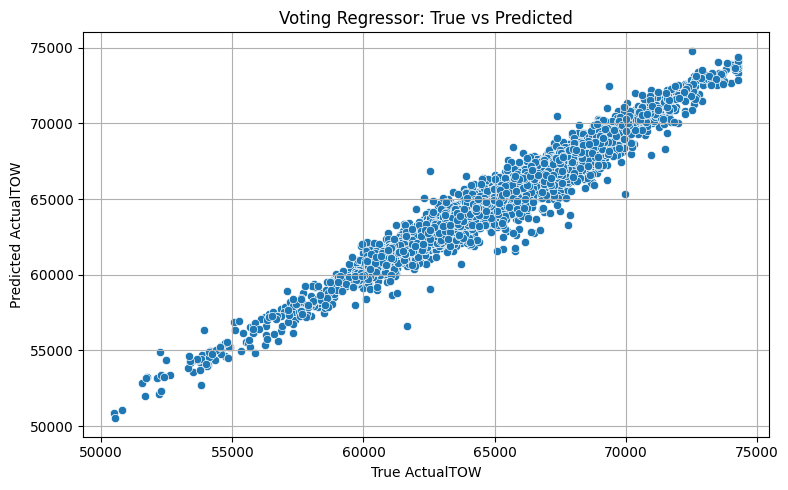

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True ActualTOW")
plt.ylabel("Predicted ActualTOW")
plt.title("Voting Regressor: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()